In [1]:
import numpy as np
import healpy as hp
import pandas as pd
import matplotlib.pyplot as plt
import scipy.ndimage.filters as flt
from struct import *
import datetime

In [5]:
N = 2**22
phi = np.random.random(N)* 2 * np.pi 
costheta = (np.random.random(N) - 0.5) * 2
#u = random(0,1)
theta = np.arccos(costheta )
#r = R * cuberoot( u )

In [6]:
# set resolution
nside = 256
npix = hp.nside2npix(nside);
print(npix)

786432


In [7]:
p = hp.ang2pix(nside, theta, phi)        

In [8]:
m = np.zeros(npix, float)

In [9]:
for i in p:
    m[i]+=1

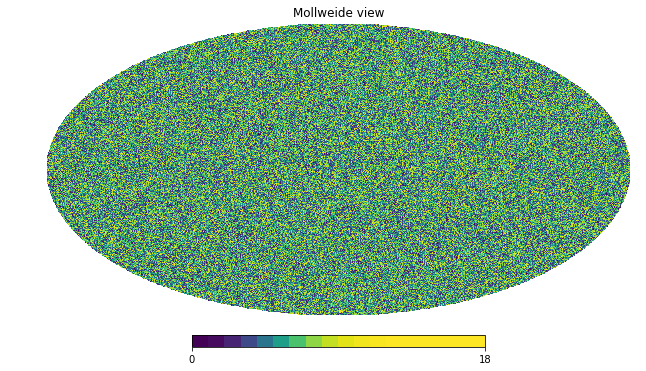

In [10]:
hp.mollview(m, norm ='hist')

In [11]:
cl = hp.anafast(m)

In [12]:
ell = np.arange(len(cl))

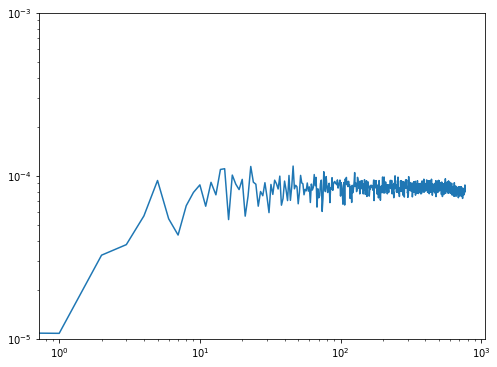

In [13]:
fig, ax = plt.subplots(1, 1,figsize=(8,6))
ax.loglog(ell,cl)
plt.ylim(1e-5, 1e-3)
fig.show()

In [14]:
sc = 10
phi = np.linspace(0, 2 * np.pi, N) + np.random.normal(loc = 0.0, scale = sc, size = N)
costheta = ((np.linspace(0,1,N) + np.random.normal(loc = 0.0, scale = sc, size = N)) % 1 - 0.5) *2
theta = np.arccos(costheta )

In [15]:
phi = np.linspace(0, 2 * np.pi, N) 
costheta = np.linspace(-1.0,1.0,N) 
theta = np.arccos(costheta )

In [16]:
p1 = hp.ang2pix(nside, theta, phi)      

In [17]:
m1 = np.zeros(npix, float)

In [18]:
for i in p1:
    m1[i]+=1

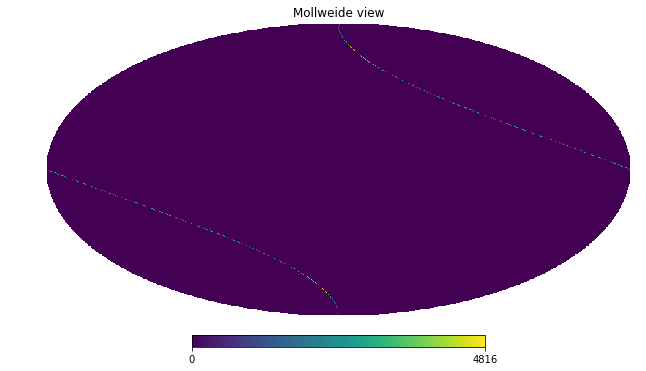

In [19]:
hp.mollview(m1, norm ='None')

In [20]:
cl1 = hp.anafast(m1)

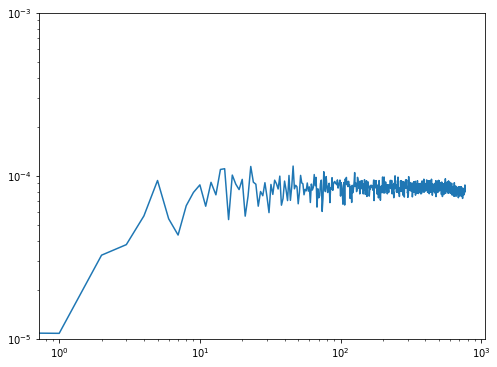

In [21]:
fig, ax = plt.subplots(1, 1,figsize=(8,6))
ax.loglog(ell,cl)
ax.loglog(ell,cl1)
plt.ylim(1e-5, 1e-3)
fig.show()

In [22]:
ml = 1e-6/ell[1::]**3

In [23]:
m0 = hp.synfast(ml, nside,new=True)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


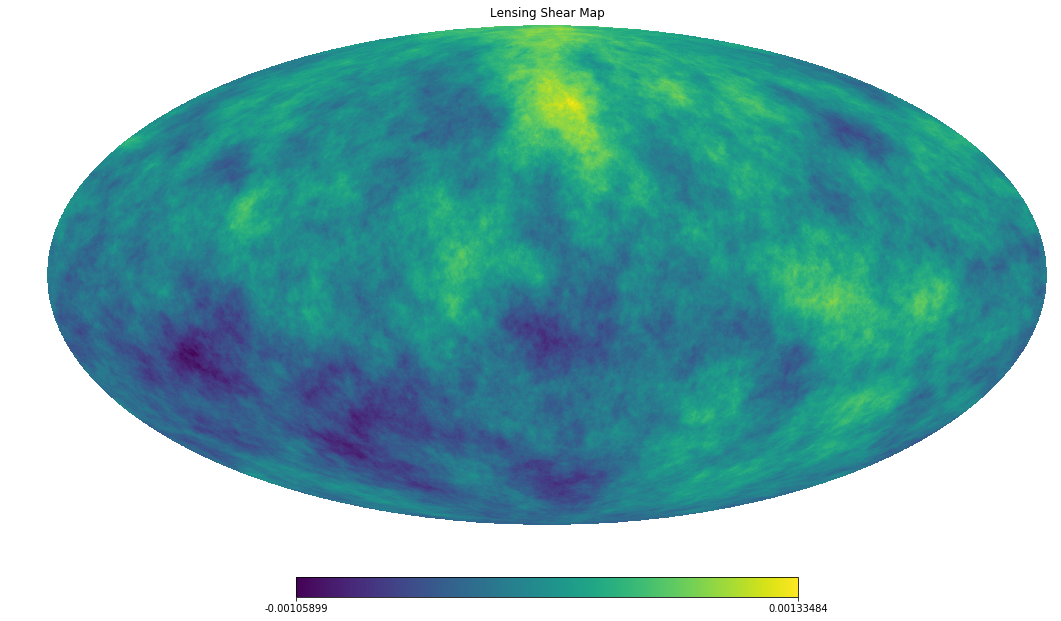

In [34]:
fig, ax = plt.subplots(1,1, figsize=(18,18))
plt.axes(ax)
hp.mollview(m0, norm ='none', title = 'Lensing Shear Map', hold = True, xsize = 3600)
plt.savefig('Lensing Shear Map')

In [38]:
cl0 = hp.anafast(m0)

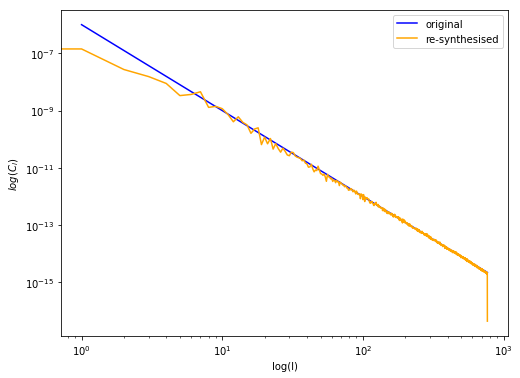

In [39]:
fig, ax = plt.subplots(1, 1,figsize=(8,6))
ax.loglog(ell[1::], ml, color = 'blue', label = 'original')
ax.loglog(ell, cl0, color = 'orange', label = 're-synthesised')
ax.set_xlabel('log(l)')
ax.set_ylabel('$log(C_l)$')
ax.legend()
plt.show()

In [40]:
for i,m in enumerate(m0):
    ang = hp.pix2ang(nside, i)
    #print (ang)
    theta = ang[0]
    phi = ang[1]
    if (phi > np.pi/2) or (theta > np.pi/2): 
        m0[i] = hp.UNSEEN

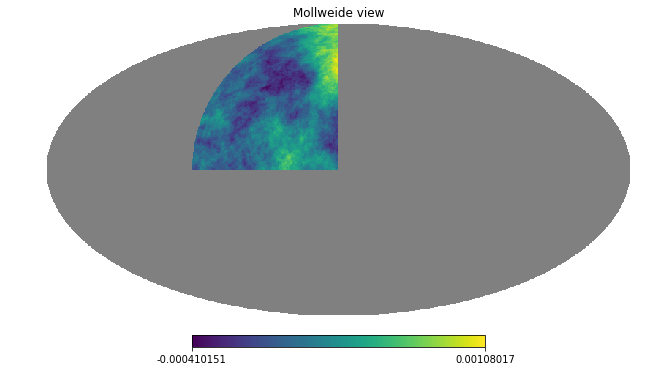

In [41]:
hp.mollview(m0, norm ='None')

In [42]:
cl2 = hp.anafast(m0)

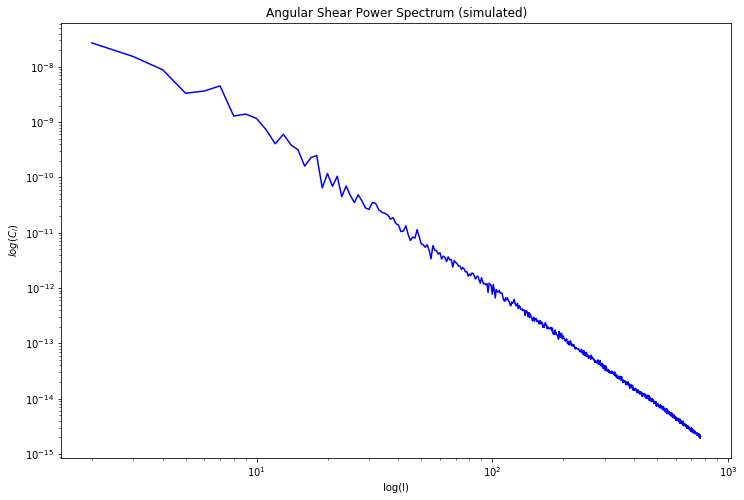

In [52]:
fig, ax = plt.subplots(1, 1,figsize=(12,8))
#ax.loglog(ell[1::], ml, color = 'orange', label = 'original')
ax.loglog(ell[2:-2:], cl0[2:-2:], color = 'blue', label = 're-synthesised')
#ax.loglog(ell, cl2, color = 'green', label = 'truncated')
ax.set_xlabel('log(l)')
ax.set_ylabel('$log(C_l)$')
#ax.set_xlim(0.1, 600)
#ax.legend()
plt.title('Angular Shear Power Spectrum (simulated)')
#plt.show()
plt.savefig('Angular Shear Power Spectrum')

In [231]:
ml[100]/6

1.6176502465460742e-13

In [229]:
cl2[100]

1.6370420670041116e-13